# CNN

In [1]:
import tensorflow as tf
from tensorflow.image import resize
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Model
from keras.applications.vgg19 import VGG19
from tensorflow.keras.utils import to_categorical
from keras.optimizers import Adam

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #load the dataset
x_train, x_test = x_train / 255.0, x_test / 255.0    #Normalization
y_train, y_test = to_categorical(y_train), to_categorical(y_test) # one hot encoding

In [3]:
model = tf.keras.models.Sequential([
    Conv2D(8,(3,3),activation='relu',input_shape = (28,28,1)),
    MaxPooling2D(),
    Conv2D(16,(3,3),activation='relu'),
    MaxPooling2D(),
    Conv2D(32,(3,3),activation='relu'),
    Flatten(),
    Dense(64,activation='relu'),
    Dropout(0.25),
    Dense(10,activation='softmax')
])

In [4]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [5]:
history = model.fit(x_train,y_train,epochs=5,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/5
938/938 [==============================] - 8s 8ms/step - loss: 0.3364 - accuracy: 0.8936 - val_loss: 0.0809 - val_accuracy: 0.9742
Epoch 2/5
938/938 [==============================] - 7s 7ms/step - loss: 0.1025 - accuracy: 0.9696 - val_loss: 0.0619 - val_accuracy: 0.9802
Epoch 3/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0759 - accuracy: 0.9766 - val_loss: 0.0496 - val_accuracy: 0.9834
Epoch 4/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0644 - accuracy: 0.9804 - val_loss: 0.0394 - val_accuracy: 0.9870
Epoch 5/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0527 - accuracy: 0.9838 - val_loss: 0.0438 - val_accuracy: 0.9861


In [6]:
score = model.evaluate(x_test,y_test)
print('Loss = ',round(score[0],4),'\nAccuracy =',round(score[1],4))

313/313 [==============================] - 1s 3ms/step - loss: 0.0438 - accuracy: 0.9861
Loss =  0.0438 
Accuracy = 0.9861


# VGG 19

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Load a subset of the dataset (5000 training images and 500 testing images)
X_train, y_train = X_train[:5000], y_train[:5000]
X_test, y_test = X_test[:500], y_test[:500]

In [12]:
# Convert grayscale images to RGB (VGG requires 3 channels)
X_train_rgb = tf.image.grayscale_to_rgb(tf.expand_dims(X_train, axis=-1))
X_test_rgb = tf.image.grayscale_to_rgb(tf.expand_dims(X_test, axis=-1))

# Resize images to match VGG input size (64x64)
X_train_resized = tf.image.resize(X_train_rgb, (64, 64))
X_test_resized = tf.image.resize(X_test_rgb, (64, 64))

# Normalize pixel values to [0, 1]
X_train_resized = X_train_resized / 255.0
X_test_resized = X_test_resized / 255.0

# Convert labels to one-hot encoding
y_train_rgb = to_categorical(y_train, num_classes=10)
y_test_rgb = to_categorical(y_test, num_classes=10)

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Add custom classification layers on top
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model_finetuned = Model(inputs=base_model.input, outputs=output) # Create the fine-tuned model

# Freeze the layers of the base VGG model
for layer in base_model.layers:
    layer.trainable = False

model_finetuned.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy',metrics=['accuracy'])

# Train the model
history_finetuned = model_finetuned.fit(X_train_resized, y_train_rgb, batch_size=64, 
                                        epochs=5, validation_data=(X_test_resized, y_test_rgb))

# Evaluate the model
loss, accuracy = model_finetuned.evaluate(X_test_resized, y_test_rgb)
print("Test accuracy:", round(accuracy,4))

Epoch 1/5
79/79 [==============================] - 40s 501ms/step - loss: 0.5989 - accuracy: 0.8360 - val_loss: 0.2637 - val_accuracy: 0.9380
Epoch 2/5
79/79 [==============================] - 42s 533ms/step - loss: 0.1753 - accuracy: 0.9540 - val_loss: 0.1751 - val_accuracy: 0.9540
Epoch 3/5
79/79 [==============================] - 44s 555ms/step - loss: 0.1139 - accuracy: 0.9702 - val_loss: 0.1307 - val_accuracy: 0.9640
Epoch 4/5
79/79 [==============================] - 45s 574ms/step - loss: 0.0905 - accuracy: 0.9770 - val_loss: 0.1270 - val_accuracy: 0.9620
Epoch 5/5
16/16 [==============================] - 4s 252ms/step - loss: 0.1123 - accuracy: 0.9720
Test accuracy: 0.972


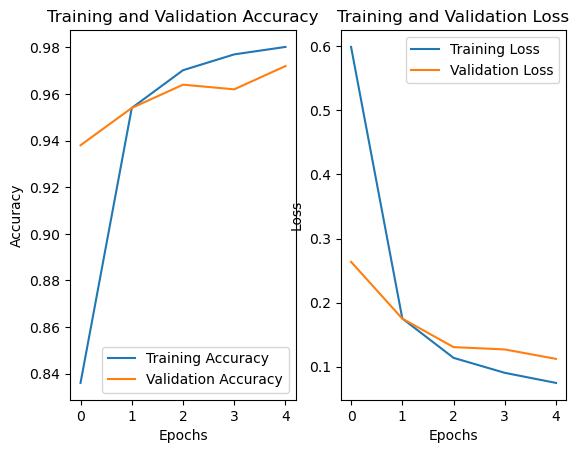

In [14]:
plt.subplot(1, 2, 1)
plt.plot(history_finetuned.history['accuracy'], label='Training Accuracy')
plt.plot(history_finetuned.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_finetuned.history['loss'], label='Training Loss')
plt.plot(history_finetuned.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()